In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels
from heatmapannot import heatmapannot


%load_ext autoreload
%autoreload 2

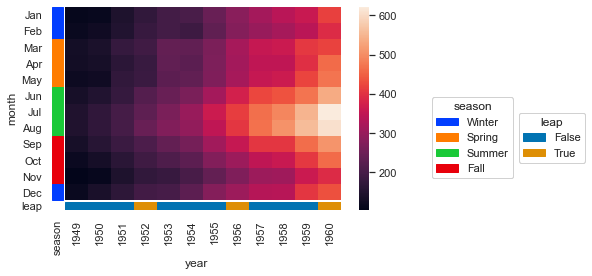

In [288]:
#import seaborn
import seaborn as sns

#load "flights" dataset
df = sns.load_dataset("flights")
monthToSeason = {"Jan":"Winter", "Feb":"Winter", "Mar":"Spring", "Apr":"Spring", "May":"Spring",
                "Jun":"Summer", "Jul":"Summer", "Aug":"Summer", "Sep":"Fall", "Oct":"Fall", "Nov":"Fall",
                "Dec":"Winter"}
df["season"] = df["month"].map(monthToSeason)
df["leap"] = df["year"].map(lambda x: x%4==0)
heatmapdf = df.pivot("month", "year", "passengers")

sns.heatmap(heatmapdf)
heatmapannot.AddHeatmapAnnot(data=df, heatmap_row="month", heatmap_col="year",
                            row_features = ["season"], col_features = ["leap"],
                            row_palettes = ["bright"])# col_colormaps = [{True:"r", False:"b"}])
plt.tight_layout()
#view first five rows of dataset
#data.head()

In [271]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [264]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
snsFig = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           ax = ax)

#snsFig.add_patch(Rectangle([-1, 2], 1, 1, color="green", clip_on=False))
#snsFig.set_xlim(-1, 26)
heatmapannot.AddHeatmapAnnot(row_palettes=["bright", "colorblind"], col_palettes=["bright"], ax=snsFig)
#heatmapannot.AddHeatmapAnnot(row_palettes=["bright"], ax=snsFig)
plt.tight_layout()
plt.show()

,year,month,passengers,season,leap
0,1949,Jan,112,Winter,False
1,1949,Feb,118,Winter,False
2,1949,Mar,132,Spring,False
3,1949,Apr,129,Spring,False
4,1949,May,121,Sprint,False
...,...,...,...,...,...
139,1960,Aug,606,Summer,True
140,1960,Sep,508,Fall,True
141,1960,Oct,461,Fall,True
142,1960,Nov,390,Fall,True


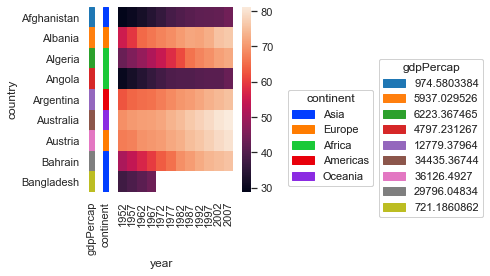

In [282]:
short_df = gapminder.head(100)
fig, ax = plt.subplots(figsize=(4,4))
heatmap_data = pd.pivot_table(short_df, values='lifeExp', 
                     index=['country'], 
                     columns='year')
snsFig = sns.heatmap(heatmap_data)
heatmapannot.AddHeatmapAnnot(data=short_df, heatmap_row="country", row_features = ["continent", "gdpPercap"],
                            row_palettes=["bright", "tab10"], gap=1, ax=snsFig)
plt.tight_layout()

In [157]:
fig.bbox.transformed(ax.transData.inverted()).get_points()

array([[-8.21631515, 12.93312597],
       [16.3645209 , -0.50388802]])

In [180]:
for a in ax.artists:
    print(a.get_tightbbox(renderer = fig.canvas.get_renderer()).transformed(snsFig.transData.inverted()).get_points())

[[15.45933939  4.94695068]
 [20.40871811  0.2672714 ]]
[[23.27540342  7.9598283 ]
 [29.3233592   0.2672714 ]]


In [ ]:
b

In [111]:
fig.get_boundbox(renderer = fig.canvas.get_renderer()).transformed(snsFig.transData.inverted())

AttributeError: 'Figure' object has no attribute 'get_boundbox'

In [126]:
fig.bbox.transformed(snsFig.transData.inverted()).get_points()

array([[-4.22177419, 10.49006623],
       [17.55241935, -1.43046358]])

In [62]:
fig.transFigure

Bbox([[21.17002688172043, 3.2698675496688754], [29.801579301075265, 0.10347682119205359]])

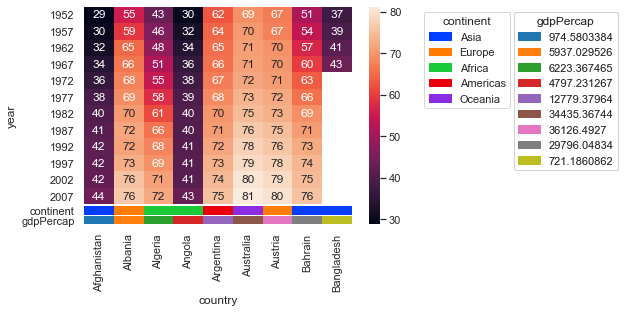

In [155]:
short_df = gapminder.head(100)
heatmap_data = pd.pivot_table(short_df, values='lifeExp', 
                     index=['year'], 
                     columns='country')
snsFig = sns.heatmap(heatmap_data, annot=True)
heatmapannot.AddHeatmapAnnot(data=short_df, heatmap_col="country", col_features = ["continent", "gdpPercap"],
                            col_palettes=["bright", "tab10"])

In [153]:
short_df

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
95,Bahrain,2007,708573.0,Asia,75.635,29796.048340
96,Bangladesh,1952,46886859.0,Asia,37.484,684.244172
97,Bangladesh,1957,51365468.0,Asia,39.348,661.637458
98,Bangladesh,1962,56839289.0,Asia,41.216,686.341554
